In [30]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [31]:

# Get the list of S&P 500 constituents
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['-', 'BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [32]:
sp500

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-11,36.011604,24.501850,17.576412,34.966351,NaN,30.160448,19.126667,62.476109,54.639999,39.055271,...,153.203476,20.120661,61.308762,44.734360,28.906889,43.328606,80.971931,50.570000,22.916479,28.943815
2013-12-12,36.287399,23.992775,17.550743,34.780457,NaN,29.921335,19.126667,62.207417,53.990002,38.605907,...,152.177582,20.251884,62.024235,44.503719,29.433901,42.555943,80.667206,50.680000,23.125395,29.018288
2013-12-13,36.221729,24.728106,17.359436,34.767181,NaN,30.012035,19.006666,62.089832,60.889999,38.846638,...,154.102188,20.222719,61.991714,44.134705,29.697414,42.680756,81.124306,50.299999,22.876299,29.399982
2013-12-16,36.274265,25.086351,17.455557,35.431061,NaN,30.119223,19.023333,62.660839,58.500000,39.111454,...,155.000885,20.404968,63.234016,43.977852,29.767675,43.524738,81.025719,51.160000,22.948614,29.790989
2013-12-17,37.016300,24.605553,17.376959,35.603672,NaN,30.185179,18.956667,62.140205,57.669998,39.271931,...,154.712601,20.317492,62.928303,43.784130,29.952131,42.716431,81.231865,50.990002,22.554895,29.455839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05,127.879997,13.130000,193.419998,144.570007,133.710007,104.349998,81.849998,335.829987,602.219971,180.630005,...,82.209999,61.029999,100.440002,32.180000,105.790001,124.379997,115.820000,234.360001,37.389999,179.649994
2023-12-06,128.910004,13.480000,192.320007,146.380005,135.309998,104.940002,79.970001,335.410004,595.700012,180.570007,...,82.400002,61.970001,99.110001,32.209999,106.099998,124.809998,116.129997,234.130005,37.150002,182.000000
2023-12-07,128.679993,13.910000,194.270004,147.970001,139.839996,104.050003,78.339996,335.100006,608.780029,184.380005,...,82.529999,61.549999,98.419998,32.480000,106.040001,124.269997,117.290001,233.229996,38.380001,181.830002


In [39]:
# 20 Day lag. Change time_period before running code
time_period = 1260  # 1 year 252, 5 year 1260 
start_period = -20 - time_period
end_period = -20  
lagged_closed_price = sp500[start_period:end_period]
rolling_mean_price = sp500[-time_period:].rolling(window=time_period-252).mean().dropna(how='all')
rolling_mean_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-08,108.099196,20.646152,107.607264,95.084363,NaN,97.081309,38.731647,239.636213,411.415933,129.013973,...,96.892364,60.176354,58.113449,47.892064,87.954721,102.777731,126.585374,332.285287,44.096425,149.744630
2022-12-09,108.182352,20.626537,107.707139,95.171034,NaN,97.121178,38.763859,239.771978,411.501796,129.098359,...,96.875604,60.197390,58.153980,47.887274,88.002149,102.820245,126.604845,332.368204,44.104118,149.810158
2022-12-12,108.267412,20.607334,107.809543,95.259420,NaN,97.162133,38.796359,239.911044,411.593889,129.186086,...,96.860902,60.220055,58.196850,47.882229,88.052042,102.865046,126.625176,332.455635,44.113326,149.874320
2022-12-13,108.354097,20.587152,107.912802,95.346964,NaN,97.204442,38.828819,240.052754,411.690030,129.276561,...,96.842809,60.243230,58.241339,47.877243,88.103404,102.909754,126.646899,332.544682,44.122194,149.939665
2022-12-14,108.438559,20.568706,108.013392,95.435273,NaN,97.246809,38.861825,240.189148,411.781141,129.363886,...,96.825590,60.265431,58.284333,47.873014,88.154569,102.952784,126.668983,332.632688,44.131388,150.001673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05,122.038300,16.627631,137.105414,115.389167,NaN,104.345998,48.116974,270.846349,454.508512,148.742160,...,92.797983,63.062028,70.066874,44.915896,95.341955,110.956300,128.359460,349.495585,43.142581,165.935204
2023-12-06,122.088092,16.613941,137.232964,115.462024,NaN,104.371112,48.155595,270.992169,454.799375,148.816466,...,92.763822,63.068554,70.109936,44.893180,95.375970,110.988668,128.335993,349.476656,43.137009,166.000204
2023-12-07,122.137077,16.600816,137.361522,115.536856,NaN,104.395287,48.192312,271.137429,455.102699,148.894938,...,92.730248,63.074549,70.152507,44.870068,95.410371,111.021128,128.314376,349.458412,43.132494,166.064678


In [40]:

# Function to calculate momentum factors
def calculate_momentum_factors(tickers, time_period):

    # Calculating 52 Week trend
    slope_info = pd.DataFrame(index = sp500.columns)
    for i in range(1,21):
        slope_info[i] = np.polyfit(range(len(rolling_mean_price[-i- 252: -i ])), rolling_mean_price[-i-252 : -i], 1)[0]  
    _52_week_trend = slope_info.mean(axis=1) 


    # Percent above 260 day Low
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Oscillator calculations
    oscillator = (lagged_closed_price.rolling(window=4).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # 39 week returns
    _39_week_return = lagged_closed_price.pct_change(periods=39*5)
    _39_week_return= _39_week_return.dropna(how='all').mean()    

    # Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)
    weekly_means = sp500[start_period:end_period].rolling(5).mean()
    weekly_volume = volume[start_period:end_period].rolling(5).mean()
    volume_price_trend = (weekly_means.pct_change() * weekly_volume).sum()
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = _39_week_return
    new_table['51 Week Volume Price Trend'] = volume_price_trend

    return new_table



In [41]:
momentum_factors = calculate_momentum_factors(tickers, time_period)
momentum_factors



,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.055275,38.402437,7.581086,0.137428,4.009787e+04
AAL,-0.015913,44.130751,-7.312122,-0.051454,7.375846e+07
AAPL,0.122617,60.702381,17.079014,0.314726,9.141427e+07
ABBV,0.082672,40.546786,11.410749,0.174934,1.084700e+06
ABNB,NaN,32.378925,-6.707478,-0.049150,-1.553590e+06
...,...,...,...,...,...
YUM,0.032896,36.522870,3.640518,0.081645,2.261013e+05
ZBH,0.011116,35.118386,0.594804,0.042708,-9.262938e+05
ZBRA,0.077950,58.163532,5.292261,0.151479,-3.800400e+05
ZION,-0.005773,52.391695,-0.632412,0.032683,-6.573275e+06


In [42]:
z_scores = (momentum_factors - momentum_factors.mean()) / momentum_factors.std()
z_scores = z_scores.sum(axis=1)



In [43]:
z_scores.sort_values(ascending=True, inplace= True)
long_basket= z_scores[-10:]
short_basket = z_scores[:10]

print("Long Basket:", long_basket)
print("Short Basket:", short_basket)


Long Basket: SEDG     8.115000
FCX      8.164093
CMG      9.679791
AZO      9.832487
AMD     10.523266
NVR     15.562878
NVDA    16.124535
ENPH    19.207597
MRNA    20.515653
TSLA    43.311730
dtype: float64
Short Basket: VFC    -7.609260
VTRS   -6.574858
WBD    -6.254731
FIS    -6.100345
PARA   -6.046068
BAX    -5.941763
WBA    -5.578920
MMM    -5.285812
BXP    -5.265944
VZ     -5.164079
dtype: float64


In [44]:
sp500[start_period:end_period]

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-08,65.356926,36.273460,50.027740,69.458946,NaN,67.089775,28.350000,153.369659,249.960007,81.346848,...,93.664810,42.843021,62.634922,34.948212,67.319145,82.338417,111.415977,182.479996,42.456165,91.606888
2018-11-09,64.855568,35.643646,49.063133,70.298203,NaN,66.933449,28.350000,153.975693,244.839996,79.230171,...,93.002670,43.720203,62.619431,34.245449,66.679436,82.575081,109.920708,181.500000,42.237228,91.964050
2018-11-12,62.185001,36.273460,46.591610,71.010742,NaN,64.882881,28.010000,151.449051,236.669998,76.163719,...,94.118858,44.388958,61.814140,34.701302,64.901443,81.419090,106.948860,177.429993,41.630955,91.153206
2018-11-13,62.030735,37.178818,46.126102,69.846893,NaN,63.898964,28.150000,150.526016,238.740005,77.158745,...,96.474182,44.623455,60.397125,34.862740,64.703880,81.036804,105.519012,176.869995,41.461517,90.902214
2018-11-14,61.191971,37.503574,44.823170,69.918129,NaN,63.825413,27.889999,149.444519,235.220001,77.909523,...,97.656586,44.432381,59.924793,34.292938,64.101830,81.173347,104.976990,173.259995,40.538082,89.270882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,107.529999,11.660000,178.994186,141.199997,118.169998,95.000000,85.160004,313.089996,565.450012,166.784149,...,94.863625,60.560001,104.910667,28.559999,95.846313,125.794975,109.300003,206.020004,33.769039,163.169998
2023-11-07,110.540001,11.750000,181.580780,142.160004,121.080002,94.800003,85.410004,315.190002,585.200012,167.321609,...,92.909317,59.830002,103.265701,28.400000,96.454315,124.889267,105.930000,208.039993,33.689999,167.160004
2023-11-08,109.389999,12.010000,182.649368,142.029999,117.660004,94.739998,84.120003,317.820007,585.309998,168.117874,...,92.630135,59.080002,101.997307,27.680000,96.494186,125.018654,104.860001,206.440002,33.759998,170.869995


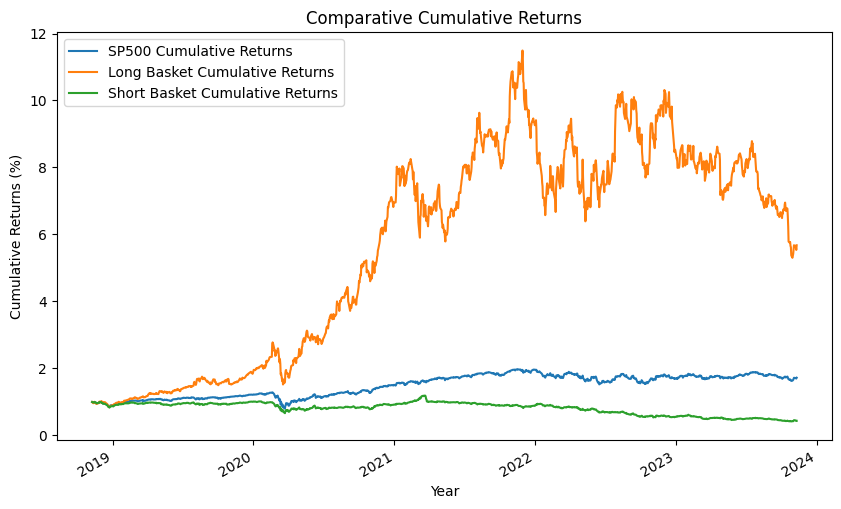

In [38]:
#Back-Test period of time_period year (20 Day Lag)

long_list =long_basket.index
short_list= short_basket.index

long_basket_close =sp500[start_period:end_period][long_list]
short_basket_close =sp500[start_period:end_period][short_list]


# I should make this next part a function, for autonomy
returns = sp500[start_period:end_period].pct_change()
cumulative_returns = (1 + returns).cumprod().mean(axis=1)


long_returns = long_basket_close.pct_change()
long_cumulative_returns = (1+long_returns).cumprod().mean(axis=1)

short_returns = short_basket_close.pct_change()
short_cumulative_returns = (1+short_returns).cumprod().mean(axis=1)



plt.figure(figsize=(10,6))
cumulative_returns.plot(label='SP500 Cumulative Returns')
long_cumulative_returns.plot(label='Long Basket Cumulative Returns')
short_cumulative_returns.plot(label='Short Basket Cumulative Returns')

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()




# There is an issue with the way I'm graphing cumulative returns. The spread gets bigger as time increases.
